In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import unittest
import tqdm.notebook as tq
import solitaire_env
import sys
import seaborn as sns
import pickle as pkl
sys.setrecursionlimit(10**6)

In [2]:
def greedy_policy(en,tot,action_freq,actions_matrix,game,fp_flag=False):
    
    actions_m = []
    
    start_state = en.copy_state()
    
    games_states = [start_state]
    
    for step in range(tot):
        
        for action in range(6):
            
            won,taken = en.step(action,fp_flag)
            
             
            if won == True:
                action_freq[action]+=1
                
                actions_m.append(action)
                
                game_states.append(en.state)
                
                actions_matrix[game] = [game,actions_m,en.state,start_state,game_state,True] 
                
                
                return step,True
            
            if taken == True:
                action_freq[action]+=1
                
                actions_m.append(action)
                game_states.append(en.state)
                
                break

        if taken == False:
            
            actions_matrix[game] = [game,actions_m,en.state,start_state,game_states,False] 
            
            return step,False
        
       
    actions_matrix[game] = [game,actions_m,en.state,start_state,game_states,False] 
    
    return step,False
        

In [3]:

start = time.time()


count = 0

number_of_games = 1000

action_type = {0:'tableau_to_foundation_reveal',\
               1:'to_foundation_stack',2:'tableau_to_tableau_reveal',\
               3:'pile_to_tableau',\
                4:'foundation_to_tableau',\
               5:'tableau_to_tableau_not_reveal'\
              }


actions_for_each_game = [0]*number_of_games
iterations_used_per_game = [0]*number_of_games
different_states_per_game = [0]*number_of_games


        
actions_matrix = [0]*number_of_games

for this_game in tq.tqdm(range(number_of_games)):
    
    
    en = solitaire_env.env()
    tot = 20000
    action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
    
    
    step,won = greedy_policy(en,tot,action_freq,actions_matrix,this_game,fp_flag=True)
             
        
    if won == True:
        count+=1
        
    actions_for_each_game[this_game] = action_freq
    different_states_per_game[this_game] = len(en.hashable_map.keys())
    iterations_used_per_game[this_game] = step
    
print((time.time()-start)/60)


0.3107676108678182


In [4]:
count

32

In [5]:
it = pd.DataFrame(data = {"iterations":iterations_used_per_game})['iterations'].value_counts()

In [6]:
it

35    40
26    39
31    38
32    36
29    36
      ..
87     1
90     1
91     1
92     1
9      1
Name: iterations, Length: 84, dtype: int64

In [7]:
max_step_taken = max(it.index)
max_step_taken

96

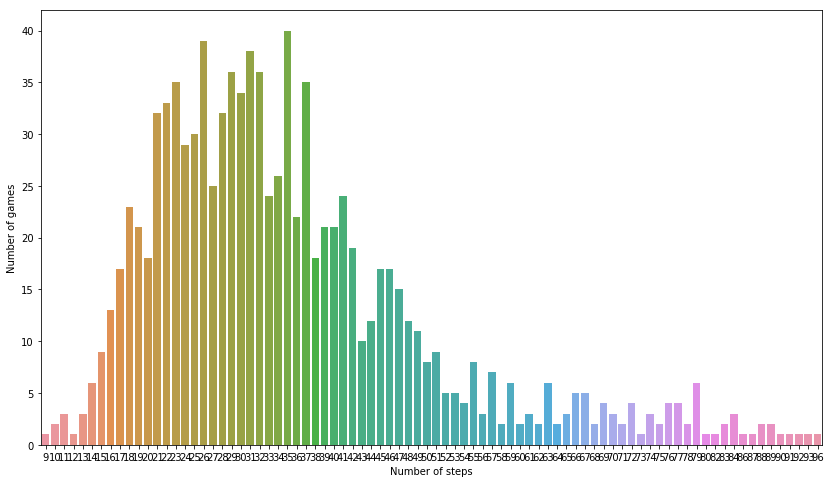

In [8]:
plt.figure(figsize=(14,8))
plt.xlabel("Number of steps")
plt.ylabel("Number of games")
sns.barplot(it.index,it.values)
plt.savefig("Foundation_Progression_included.jpg")

In [9]:

len(actions_matrix[0][1])

42

In [10]:
action_count = [len(actions_matrix[i][1]) for i in range(number_of_games)]

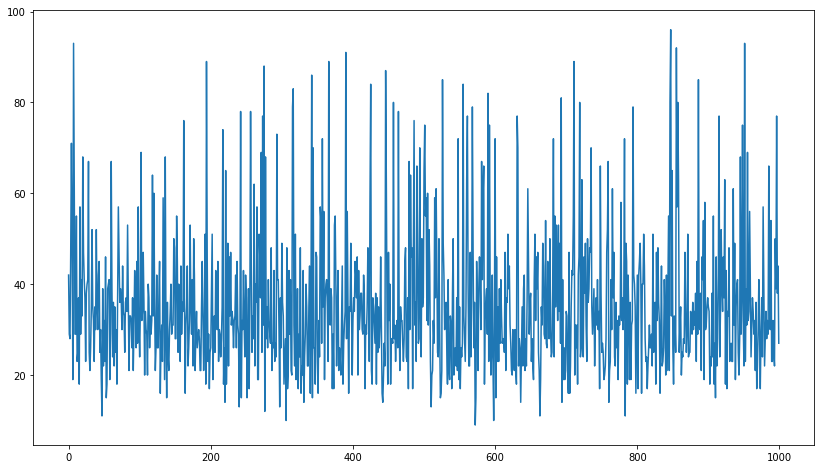

In [11]:
plt.figure(figsize=(14,8))
plt.plot(range(number_of_games),action_count)

In [12]:
actions_matrix.sort(key = lambda x:len(x[1]))

In [13]:
actions_matrix[0]

[572,
 [1, 1, 2, 2, 3, 3, 3, 3, 3],
 False]

In [14]:
max_step_games = []
for i in range(number_of_games):
    
    if len(actions_matrix[i][1])>90:
        print(len(actions_matrix[i][1]))
    if len(actions_matrix[i][1]) == max_step_taken:
        action_string = "".join([str(x) for  x in actions_matrix[i][1]])
        max_step_games.append([actions_matrix[i][0],action_string,actions_matrix[i][2]])
        

91
92
93
93
96


In [96]:
len(max_step_games)

1

In [97]:
k = 0
game_no, game_action_seq, game_end_state = max_step_games[k]

[4, 48, 15, 16, 24, 0]


<BarContainer object of 6 artists>

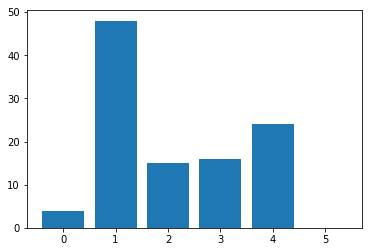

In [98]:

mp = actions_for_each_game[game_no]
values = [mp[i] for i in range(6)]
print(values)
plt.bar([0,1,2,3,4,5],values)

In [99]:
en.state = start_states[game_no]


## Start of game 

In [100]:
en.get_pile()

suit = spade      color = black      number =    12 speciality = QUEEN      face = up   
suit = club       color = black      number =     3 speciality = None       face = up   
suit = heart      color = red        number =     4 speciality = None       face = up   
suit = spade      color = black      number =     8 speciality = None       face = up   
suit = diamond    color = red        number =    10 speciality = None       face = up   
suit = diamond    color = red        number =    12 speciality = QUEEN      face = up   
suit = spade      color = black      number =     6 speciality = None       face = up   
suit = heart      color = red        number =     5 speciality = None       face = up   
suit = spade      color = black      number =    10 speciality = None       face = up   
suit = diamond    color = red        number =     5 speciality = None       face = up   
suit = diamond    color = red        number =     3 speciality = None       face = up   
suit = spade      col

In [101]:
en.get_foundation()

printing foundation number 1 ********************
printing foundation number 2 ********************
printing foundation number 3 ********************
printing foundation number 4 ********************


In [102]:
en.get_tableau()

printing tableau number 1 ********************
suit = diamond    color = red        number =    11 speciality = JACK       face = up   
printing tableau number 2 ********************
suit = heart      color = red        number =     1 speciality = ACE        face = down 
suit = club       color = black      number =    11 speciality = JACK       face = up   
printing tableau number 3 ********************
suit = diamond    color = red        number =     6 speciality = None       face = down 
suit = spade      color = black      number =    13 speciality = KING       face = down 
suit = heart      color = red        number =     2 speciality = None       face = up   
printing tableau number 4 ********************
suit = club       color = black      number =    12 speciality = QUEEN      face = down 
suit = club       color = black      number =     6 speciality = None       face = down 
suit = spade      color = black      number =     5 speciality = None       face = down 
suit = diam

## After taking n number of steps

In [103]:



this_game_actions = game_action_seq[:]
print(this_game_actions)
count1 = 0
for c in this_game_actions:
    if c == '1':
        count1+=1
        
print(count1,len(this_game_actions)-count1)

01112222011233320133334223423211111111111333333434244122201111111111111121144411444114441144441114144411411
48 59


In [104]:
en.state = start_states[game_no]
for a in this_game_actions:
    action = int(a)
    w,t = en.step(action,fp_flag=True)

In [105]:
en.get_foundation()

printing foundation number 1 ********************
printing foundation number 2 ********************
printing foundation number 3 ********************
suit = diamond    color = red        number =     1 speciality = ACE        face = up   
suit = diamond    color = red        number =     2 speciality = None       face = up   
suit = diamond    color = red        number =     3 speciality = None       face = up   
printing foundation number 4 ********************
suit = spade      color = black      number =     1 speciality = ACE        face = up   
suit = spade      color = black      number =     2 speciality = None       face = up   


In [106]:
en.get_pile()

suit = diamond    color = red        number =    12 speciality = QUEEN      face = up   
suit = diamond    color = red        number =     5 speciality = None       face = up   
suit = spade      color = black      number =     4 speciality = None       face = up   
suit = heart      color = red        number =    13 speciality = KING       face = up   
suit = club       color = black      number =    13 speciality = KING       face = up   
suit = club       color = black      number =     8 speciality = None       face = up   


In [107]:
en.get_tableau()

printing tableau number 1 ********************
suit = diamond    color = red        number =    11 speciality = JACK       face = up   
suit = spade      color = black      number =    10 speciality = None       face = up   
suit = heart      color = red        number =     9 speciality = None       face = up   
suit = spade      color = black      number =     8 speciality = None       face = up   
suit = heart      color = red        number =     7 speciality = None       face = up   
suit = spade      color = black      number =     6 speciality = None       face = up   
suit = heart      color = red        number =     5 speciality = None       face = up   
suit = club       color = black      number =     4 speciality = None       face = up   
suit = heart      color = red        number =     3 speciality = None       face = up   
suit = club       color = black      number =     2 speciality = None       face = up   
printing tableau number 2 ********************
suit = heart    

## End state

In [108]:
end_en = solitaire_env.env()
end_en.state = game_end_state
end_en.get_foundation()

printing foundation number 1 ********************
suit = club       color = black      number =     1 speciality = ACE        face = up   
suit = club       color = black      number =     2 speciality = None       face = up   
suit = club       color = black      number =     3 speciality = None       face = up   
suit = club       color = black      number =     4 speciality = None       face = up   
suit = club       color = black      number =     5 speciality = None       face = up   
suit = club       color = black      number =     6 speciality = None       face = up   
suit = club       color = black      number =     7 speciality = None       face = up   
suit = club       color = black      number =     8 speciality = None       face = up   
suit = club       color = black      number =     9 speciality = None       face = up   
printing foundation number 2 ********************
suit = heart      color = red        number =     1 speciality = ACE        face = up   
suit = hea

In [109]:
end_en.get_pile()

In [110]:
end_en.get_tableau()

printing tableau number 1 ********************
suit = diamond    color = red        number =    11 speciality = JACK       face = up   
suit = spade      color = black      number =    10 speciality = None       face = up   
suit = diamond    color = red        number =     9 speciality = None       face = up   
suit = spade      color = black      number =     8 speciality = None       face = up   
printing tableau number 2 ********************
suit = heart      color = red        number =    13 speciality = KING       face = up   
printing tableau number 3 ********************
suit = diamond    color = red        number =     6 speciality = None       face = down 
suit = spade      color = black      number =    13 speciality = KING       face = up   
suit = diamond    color = red        number =    12 speciality = QUEEN      face = up   
suit = club       color = black      number =    11 speciality = JACK       face = up   
suit = heart      color = red        number =    10 specia

In [73]:
w,t = end_en.step(1,fp_flag=True)

In [74]:
w,t

(False, True)

In [75]:
end_en.get_foundation()

printing foundation number 1 ********************
suit = club       color = black      number =     1 speciality = ACE        face = up   
suit = club       color = black      number =     2 speciality = None       face = up   
suit = club       color = black      number =     3 speciality = None       face = up   
suit = club       color = black      number =     4 speciality = None       face = up   
suit = club       color = black      number =     5 speciality = None       face = up   
suit = club       color = black      number =     6 speciality = None       face = up   
suit = club       color = black      number =     7 speciality = None       face = up   
suit = club       color = black      number =     8 speciality = None       face = up   
suit = club       color = black      number =     9 speciality = None       face = up   
printing foundation number 2 ********************
suit = heart      color = red        number =     1 speciality = ACE        face = up   
suit = hea

In [76]:
end_en.get_tableau()

printing tableau number 1 ********************
suit = diamond    color = red        number =    11 speciality = JACK       face = up   
suit = spade      color = black      number =    10 speciality = None       face = up   
suit = diamond    color = red        number =     9 speciality = None       face = up   
suit = spade      color = black      number =     8 speciality = None       face = up   
printing tableau number 2 ********************
suit = heart      color = red        number =    13 speciality = KING       face = up   
printing tableau number 3 ********************
suit = diamond    color = red        number =     6 speciality = None       face = down 
suit = spade      color = black      number =    13 speciality = KING       face = up   
suit = diamond    color = red        number =    12 speciality = QUEEN      face = up   
suit = club       color = black      number =    11 speciality = JACK       face = up   
suit = heart      color = red        number =    10 specia

In [83]:
w,t = end_en.step(1,fp_flag=True)
w,t

(False, True)

In [84]:
end_en.get_foundation()

printing foundation number 1 ********************
suit = club       color = black      number =     1 speciality = ACE        face = up   
suit = club       color = black      number =     2 speciality = None       face = up   
suit = club       color = black      number =     3 speciality = None       face = up   
suit = club       color = black      number =     4 speciality = None       face = up   
suit = club       color = black      number =     5 speciality = None       face = up   
suit = club       color = black      number =     6 speciality = None       face = up   
suit = club       color = black      number =     7 speciality = None       face = up   
suit = club       color = black      number =     8 speciality = None       face = up   
suit = club       color = black      number =     9 speciality = None       face = up   
suit = club       color = black      number =    10 speciality = None       face = up   
printing foundation number 2 ********************
suit = hea

In [85]:
end_en.get_tableau()

printing tableau number 1 ********************
suit = diamond    color = red        number =    11 speciality = JACK       face = up   
suit = spade      color = black      number =    10 speciality = None       face = up   
suit = diamond    color = red        number =     9 speciality = None       face = up   
printing tableau number 2 ********************
suit = heart      color = red        number =    13 speciality = KING       face = up   
printing tableau number 3 ********************
suit = diamond    color = red        number =     6 speciality = None       face = down 
suit = spade      color = black      number =    13 speciality = KING       face = up   
suit = diamond    color = red        number =    12 speciality = QUEEN      face = up   
suit = club       color = black      number =    11 speciality = JACK       face = up   
suit = heart      color = red        number =    10 speciality = None       face = up   
suit = spade      color = black      number =     9 specia

In [87]:
w,t = end_en.step(5, fp_flag = True)
w,t

(False, False)

In [88]:
end_en.get_tableau()

printing tableau number 1 ********************
suit = diamond    color = red        number =    11 speciality = JACK       face = up   
suit = spade      color = black      number =    10 speciality = None       face = up   
suit = diamond    color = red        number =     9 speciality = None       face = up   
printing tableau number 2 ********************
suit = heart      color = red        number =    13 speciality = KING       face = up   
printing tableau number 3 ********************
suit = diamond    color = red        number =     6 speciality = None       face = down 
suit = spade      color = black      number =    13 speciality = KING       face = up   
suit = diamond    color = red        number =    12 speciality = QUEEN      face = up   
suit = club       color = black      number =    11 speciality = JACK       face = up   
suit = heart      color = red        number =    10 speciality = None       face = up   
suit = spade      color = black      number =     9 specia

In [89]:
end_en.get_foundation()

printing foundation number 1 ********************
suit = club       color = black      number =     1 speciality = ACE        face = up   
suit = club       color = black      number =     2 speciality = None       face = up   
suit = club       color = black      number =     3 speciality = None       face = up   
suit = club       color = black      number =     4 speciality = None       face = up   
suit = club       color = black      number =     5 speciality = None       face = up   
suit = club       color = black      number =     6 speciality = None       face = up   
suit = club       color = black      number =     7 speciality = None       face = up   
suit = club       color = black      number =     8 speciality = None       face = up   
suit = club       color = black      number =     9 speciality = None       face = up   
suit = club       color = black      number =    10 speciality = None       face = up   
printing foundation number 2 ********************
suit = hea

In [ ]:

with open("games/important_game1_end.pkl","wb") as file:
    pkl.dump(file)

## Check result of single action

In [52]:
e1 = end_en.state
w,t = end_en.step(4,fp_flag=True)

In [53]:
w,t

(False, True)

In [54]:
len(end_en.state.pile)

0

In [55]:
end_en.get_pile()

In [56]:
end_en.get_foundation()

printing foundation number 1 ********************
suit = club       color = black      number =     1 speciality = ACE        face = up   
suit = club       color = black      number =     2 speciality = None       face = up   
suit = club       color = black      number =     3 speciality = None       face = up   
suit = club       color = black      number =     4 speciality = None       face = up   
suit = club       color = black      number =     5 speciality = None       face = up   
suit = club       color = black      number =     6 speciality = None       face = up   
suit = club       color = black      number =     7 speciality = None       face = up   
suit = club       color = black      number =     8 speciality = None       face = up   
printing foundation number 2 ********************
suit = heart      color = red        number =     1 speciality = ACE        face = up   
suit = heart      color = red        number =     2 speciality = None       face = up   
suit = hea

In [57]:
end_en.get_tableau()

printing tableau number 1 ********************
suit = diamond    color = red        number =    11 speciality = JACK       face = up   
suit = spade      color = black      number =    10 speciality = None       face = up   
suit = diamond    color = red        number =     9 speciality = None       face = up   
suit = spade      color = black      number =     8 speciality = None       face = up   
printing tableau number 2 ********************
suit = heart      color = red        number =    13 speciality = KING       face = up   
printing tableau number 3 ********************
suit = diamond    color = red        number =     6 speciality = None       face = down 
suit = spade      color = black      number =    13 speciality = KING       face = up   
suit = diamond    color = red        number =    12 speciality = QUEEN      face = up   
suit = club       color = black      number =    11 speciality = JACK       face = up   
suit = heart      color = red        number =    10 specia

In [58]:
e2 = end_en.state

#### Second Action

In [59]:
w,t = end_en.step(1,fp_flag=True)

In [60]:
w,t

(False, True)

In [61]:
end_en.get_pile()

In [62]:
end_en.get_foundation()

printing foundation number 1 ********************
suit = club       color = black      number =     1 speciality = ACE        face = up   
suit = club       color = black      number =     2 speciality = None       face = up   
suit = club       color = black      number =     3 speciality = None       face = up   
suit = club       color = black      number =     4 speciality = None       face = up   
suit = club       color = black      number =     5 speciality = None       face = up   
suit = club       color = black      number =     6 speciality = None       face = up   
suit = club       color = black      number =     7 speciality = None       face = up   
suit = club       color = black      number =     8 speciality = None       face = up   
printing foundation number 2 ********************
suit = heart      color = red        number =     1 speciality = ACE        face = up   
suit = heart      color = red        number =     2 speciality = None       face = up   
suit = hea

In [63]:
end_en.get_tableau()

printing tableau number 1 ********************
suit = diamond    color = red        number =    11 speciality = JACK       face = up   
suit = spade      color = black      number =    10 speciality = None       face = up   
suit = diamond    color = red        number =     9 speciality = None       face = up   
suit = spade      color = black      number =     8 speciality = None       face = up   
printing tableau number 2 ********************
suit = heart      color = red        number =    13 speciality = KING       face = up   
printing tableau number 3 ********************
suit = diamond    color = red        number =     6 speciality = None       face = down 
suit = spade      color = black      number =    13 speciality = KING       face = up   
suit = diamond    color = red        number =    12 speciality = QUEEN      face = up   
suit = club       color = black      number =    11 speciality = JACK       face = up   
suit = heart      color = red        number =    10 specia

In [64]:
e3 = end_en.state

In [65]:
def compare_states(state1,state2):

    def compare_cards(card1,card2):
        
        if card1.number == card2.number and card1.face == card2.face and card1.suit == card2.suit:
            return True
        
        return False
    
    
    def check_pile(p1,p2):

        if len(p1) != len(p2):
            return False

        for cd1,cd2 in zip(p1,p2):
            
            if compare_cards(cd1,cd2) is False:
                return False
            
            
        return True
    
    def check_tableau(t1,t2):
        
        for i in range(7):
            if len(t1[i]) != len(t2[i]):
                return False
            for cd1,cd2 in zip(t1[i],t2[i]):
                if compare_cards(cd1,cd2) is False:
                    return False
    
        return True
    
    def check_foundation(f1,f2):
        
        for i in range(4):
                if len(f1[i]) != len(f2[i]):
                    return False
                for cd1,cd2 in zip(f1[i],f2[i]):
                    if compare_cards(cd1,cd2) is False:
                        return False

        return True
    
    
    
    comp =  check_foundation(state1.foundation,state2.foundation) and check_pile(state1.pile,state2.pile) and \
            check_tableau(state1.tableau,state2.tableau)
    
    return comp

In [66]:
compare_states(e1,e3)

False

In [67]:
temp_en = solitaire_env.env()
temp_en.state = e1
temp_en.step(4,fp_flag=True)
temp_en.step(1,fp_flag=True)
e4 = temp_en.state
compare_states(e1,e4)

False

In [68]:
#import pickle as pkl

In [15]:
name = "games/run_" + str(pd.Timestamp.now()) +".pkl"

In [16]:
run_data = {
    "actions_matrix":actions_matrix,
    "actions_for_each_game":actions_for_each_game,
    "different_states_per_game":different_states_per_game,
    "iterations_used_per_game":iterations_used_per_game
}

In [17]:
with open(name,"wb") as file:
    pkl.dump(run_data,file)

In [48]:
temp_en = solitaire_env.env()
temp_en.state = e1
temp_en.get_pile()
print('***************************************************************************************************')
temp_en.get_tableau()
print("***************************************************************************************************")
temp_en.get_foundation()
# temp_en.step(4,fp_flag=True)
# temp_en.step(1,fp_flag=True)
# e4 = temp_en.state
# compare_states(e1,e4)

suit = spade      color = black      number =     4 speciality = None       face = up   
suit = spade      color = black      number =     5 speciality = None       face = up   
suit = spade      color = black      number =     3 speciality = None       face = up   
suit = spade      color = black      number =    12 speciality = QUEEN      face = up   
suit = spade      color = black      number =    10 speciality = None       face = up   
***************************************************************************************************
printing tableau number 1 ********************
suit = spade      color = black      number =    13 speciality = KING       face = up   
suit = heart      color = red        number =    12 speciality = QUEEN      face = up   
suit = spade      color = black      number =    11 speciality = JACK       face = up   
printing tableau number 2 ********************
suit = diamond    color = red        number =    13 speciality = KING       face = up   
suit 

In [49]:
temp_en.generate_hashable_state(e1)

((<solitaire_env.card at 0x7f97ae9ccbe0>,
  <solitaire_env.card at 0x7f97ae9cccc0>),
 (<solitaire_env.card at 0x7f97ae9cccf8>,
  <solitaire_env.card at 0x7f97ae9ccd68>),
 (<solitaire_env.card at 0x7f97ae9ccda0>,
  <solitaire_env.card at 0x7f97ae9cce48>),
 (<solitaire_env.card at 0x7f97ae9cce80>,),
 (<solitaire_env.card at 0x7f97ae9cceb8>,),
 (<solitaire_env.card at 0x7f97ae9ccef0>,
  <solitaire_env.card at 0x7f97ae9ccf60>),
 (<solitaire_env.card at 0x7f97ae9ccf98>,
  <solitaire_env.card at 0x7f97ae9ce0b8>),
 (<solitaire_env.card at 0x7f97ae9ce128>,
  <solitaire_env.card at 0x7f97ae9ce208>),
 (<solitaire_env.card at 0x7f97ae9ce240>,
  <solitaire_env.card at 0x7f97ae9ce358>),
 (<solitaire_env.card at 0x7f97ae9ce390>,
  <solitaire_env.card at 0x7f97ae9ce0f0>),
 (<solitaire_env.card at 0x7f97ae9ce518>,
  <solitaire_env.card at 0x7f97ae9ce748>),
 ())